## Section 1: Analysis

### 1. An explanation of why the analysis is being conducted and what the hypotheses are

**(1) What is the outcome?**  
*The outcome is the sales numbers.*  

**(2) What is the main effect/predictor she wants to understand the impact of?**  
*Temperature.*

**(3) What is the hypothesis?**  
*The hypothesis is that sales are higher on hot days (high temperature) than on normal days (lower temperature).*  
*Null hypothesis is that sales are not different in hot days and in normal days.*

*There is a disagreement on whether sales are higher in hot days or not. The analysis is being conducted to test if there is a true difference between sales in higher temperature and lower/normal temperature. If the analysis result shows that there is a significant difference in sales with different temperature, we would conclude that the friend is right.* 

### 2. Descriptive information about the data, including summary statistics (such as number of observations, measures of central tendency, & measures of dispersion) and plots of the data distributions

In [1]:
import pandas as pd
import numpy as np

custard = pd.read_excel("../W4/frzn_custard.xlsx",  
                        names = ['Temperature', 'Sales'],
                        dtype = {'Temperature': np.float64})
custard = custard.dropna()
custard["Sales"] = custard["Sales"].astype("int64") 
custard.head(5)

,Temperature,Sales
0,75.0,3140
1,63.0,2448
2,85.0,2970
3,82.0,2728
4,66.0,2102


In [2]:
np.var(custard["Temperature"]), np.var(custard["Sales"])

(107.24087867693477, 158579.55068804443)

In [3]:
custard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  178 non-null    float64
 1   Sales        178 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [4]:
custard.describe()

,Temperature,Sales
count,178.000000,178.000000
mean,79.404494,2936.382022
std,10.384929,399.343812
min,57.000000,1959.000000
25%,72.000000,2652.500000
50%,79.000000,2955.500000
75%,87.000000,3199.750000
max,105.000000,3971.000000


<AxesSubplot:xlabel='Sales', ylabel='Count'>

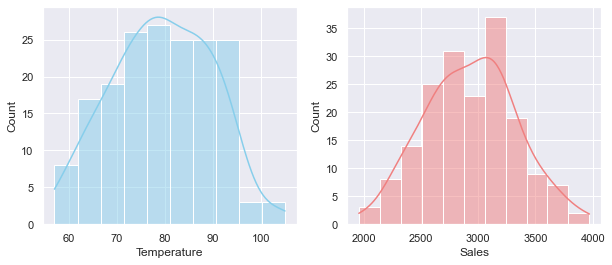

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
sns.histplot(ax = ax[0], x=custard["Temperature"], color="skyblue", label="Temperature", kde=True)
sns.histplot(ax = ax[1], x=custard["Sales"], color="lightcoral", label="Sales", kde=True)

### 3. Descriptive information about the relationships between the two variables, including correlation and scatterplots

In [6]:
np.corrcoef(custard["Temperature"], custard["Sales"])[0,1]

0.823046239446803

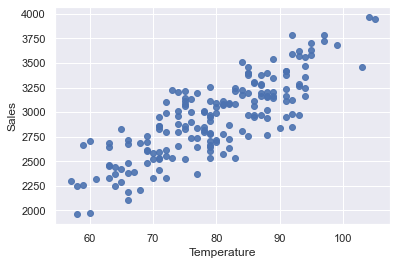

In [7]:
plt.clf()
plt.scatter(x = custard["Temperature"], y = custard["Sales"], alpha = 0.9)
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()

### 4. A regression analysis to test the hypothesis

In [8]:
import statsmodels.api as sm

x = sm.add_constant(custard["Temperature"]) # adding a constant
lm = sm.OLS(custard["Sales"], x).fit() # y, x

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           4.21e-45
Time:                        18:11:53   Log-Likelihood:                -1217.6
No. Observations:                 178   AIC:                             2439.
Df Residuals:                     176   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         423.2649    131.833      3.211      0.002     163.088     683.441
Temperature    31.6496      1.646     19.224      0.000      28.400      34.899
==============================================================================
Omnibus:                        7.647   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.999
Skew:                          -0.127   Prob(JB):                        0.135
Kurtosis:                       2.311   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
lm.predict(x)

0      2796.981724
1      2417.187032
2      3113.477300
3      3018.528627
4      2512.135705
          ...     
175    2702.033051
176    2702.033051
177    3303.374646
178    3398.323319
179    3176.776415
Length: 178, dtype: float64

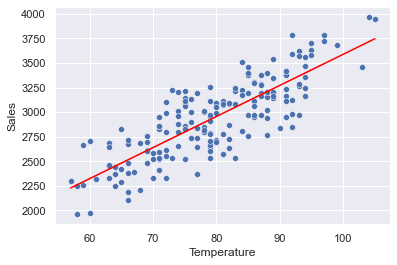

In [11]:
y_pred = 31.6496 * custard["Temperature"] + 423.2649
# coef, 
sns.scatterplot(x = custard['Temperature'], y = custard['Sales'])
sns.lineplot(x=custard['Temperature'], y = y_pred, color='red')
plt.show()

### 5. A description of the results of the analysis. Included in this description should be an interpretation of the coefficients, description of the goodness of fit, and a discussion of whether the results are statistically significant

As printed above, the coefficient between temperature and sales in the dataset is around 0.823, a highly positive number indicating a strong positive correlation.  
The p-value of temperature in predicting sales is less than 0.000, meaning that the regression result is statistically significant. It means that temperature is a strong predictor of sales, and each degree increase of temperature in F corresponds to 31.6496 more unit of sales.

## Section 2: Gradient Descent

### 1. Write a program in Python that uses gradient descent to find the regression coefficients (βs) for the frozen custard data in Section 1. 
#### a. Cite the source you used. 

source: https://neuraspike.com/blog/linear-regression-gradient-descent-python/

In [12]:
def gradient_descent(X, y, l=0.01, epochs=30):
    """
    :param X: feature matrix
    :param y: target vector
    :param l: learning rate (default:0.01)
    :param epochs: maximum number of iterations of the linear regression algorithm for a single run (default=30)
    :return: beta, list of the loss function changing overtime
    """
 
    n = np.shape(X)[0]  # total number of samples
    p = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((n, 1)), X), axis=1) # adjust shape, add a "1" column
    B = np.random.randn(p+1, ) # randomly initiate β (+1 for intercept)
 
    loss_history = []
    
    # iterate until the maximum number of epochs
    for current_iteration in range(epochs):
        
        # calculate loss = 1/2n * ∑(predict_y-actual_y)^2
        y_estimated = np.matmul(X, B)
        loss = (1 / (2*n)) * np.sum((y_estimated - y) ** 2)
        
        # Update gradient = 1/n * (predict_y-actual_y)X_T
        gradient = (1 / n) * np.matmul(X.T, y_estimated - y)
        
        # update β = β - learningRate * gradient
        B = B - l * gradient
        
        # print out the cost to see how these valueschanges after every 10th iteration
        if current_iteration % 10 == 0:
            print(f"loss:{loss} \t epoch: {current_iteration}")
 
        # keep track the cost as it changes in each iteration
        loss_history.append(loss)
 
    return B, loss_history

beta, cost_history_list = gradient_descent(np.array(custard["Temperature"]).reshape(-1,1), custard["Sales"], l=0.01, epochs=100)
print("\nβ_0:", beta[0], "\nβ_1:", beta[1])

loss:4479939.679328464 	 epoch: 0
loss:4.505724873329677e+42 	 epoch: 10
loss:4.559217370217706e+78 	 epoch: 20
loss:4.61334493633516e+114 	 epoch: 30
loss:4.66811511129881e+150 	 epoch: 40
loss:4.723535524236622e+186 	 epoch: 50
loss:4.7796138948505115e+222 	 epoch: 60
loss:4.83635803449153e+258 	 epoch: 70
loss:4.893775847248096e+294 	 epoch: 80
loss:inf 	 epoch: 90

β_0: -4.894632134847974e+179 
β_1: -3.952652747289114e+181


#### b.Graph the loss function over iterations so that you can see what is happening.

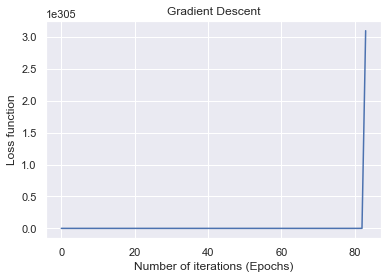

In [13]:
plt.plot(np.arange(len(cost_history_list)), cost_history_list)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Loss function")
plt.title("Gradient Descent")
plt.show()

#### c. Standardize your X and Y variables. To do this, subtract the mean from each value and divide it by the standard deviation. Please note that the input array for X needs to have a column of 1’s in it. Do not standardize the 1’s.

In [14]:
X = custard["Temperature"]
m_X = X.mean()
sd_X = X.std()
X = [(x-m_X)/sd_X for x in X]
# X = np.concatenate((np.ones((len(custard["Temperature"]), 1)), np.array(custard["Temperature"]).reshape(-1,1)), axis=1)

Y = custard["Sales"]
m_Y = Y.mean()
sd_Y = Y.std()
Y = [(y-m_Y)/sd_Y for y in Y]

#### d. Rerun your section 1 model using the standardized inputs. Compare your results using gradient descent and using the module you used in Section 1 for the standardized inputs.

In [15]:
# using stat model
X2 = sm.add_constant(X)
lm2 = sm.OLS(Y, X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     369.6
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           4.21e-45
Time:                        18:11:55   Log-Likelihood:                -151.38
No. Observations:                 178   AIC:                             306.8
Df Residuals:                     176   BIC:                             313.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.186e-16      0.043  -5.12e-15      1.000      -0.084       0.084
x1             0.8230      0.043     19.224      0.000       0.739       0.908
==============================================================================
Omnibus:                        7.647   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.999
Skew:                          -0.127   Prob(JB):                        0.135
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# gradient descent
s_beta, s_cost_history_list = gradient_descent(pd.DataFrame(X), Y, l=0.01, epochs=600)
print("\nβ_0:", s_beta[0], "\nβ_1:", s_beta[1])

loss:0.672637291948553 	 epoch: 0
loss:0.5798345296458485 	 epoch: 10
loss:0.5038446920897267 	 epoch: 20
loss:0.44162180883668123 	 epoch: 30
loss:0.39067174305664354 	 epoch: 40
loss:0.3489522167046139 	 epoch: 50
loss:0.31479094797692286 	 epoch: 60
loss:0.2868186196772155 	 epoch: 70
loss:0.2639139915989976 	 epoch: 80
loss:0.24515895681195013 	 epoch: 90
loss:0.2298017403303159 	 epoch: 100
loss:0.21722676502060462 	 epoch: 110
loss:0.2069299768552228 	 epoch: 120
loss:0.1984986404508323 	 epoch: 130
loss:0.19159479501693638 	 epoch: 140
loss:0.18594170756390882 	 epoch: 150
loss:0.18131278036168427 	 epoch: 160
loss:0.17752246801638577 	 epoch: 170
loss:0.17441884008558556 	 epoch: 180
loss:0.17187749111257447 	 epoch: 190
loss:0.16979655396988108 	 epoch: 200
loss:0.16809261662726382 	 epoch: 210
loss:0.1666973786722093 	 epoch: 220
loss:0.16555491356316218 	 epoch: 230
loss:0.1646194268758631 	 epoch: 240
loss:0.16385342068452202 	 epoch: 250
loss:0.16322619049903794 	 epoch: 2

#### e. Plot the loss (i.e. cost) function over the iterations

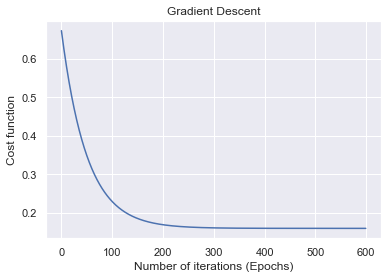

In [17]:
plt.plot(np.arange(len(s_cost_history_list)), s_cost_history_list)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Cost function")
plt.title("Gradient Descent")
plt.show()

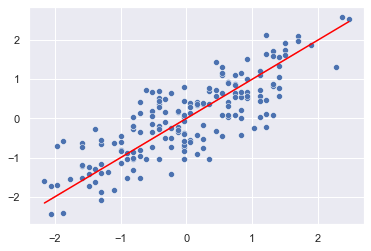

In [18]:
Y_pred = round(s_beta[1])*X + s_beta[0]
sns.scatterplot(x = X, y = Y)
sns.lineplot(x=X, y = Y_pred, color='red')
plt.show()

#### Version 2

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

In [19]:
def gd(X, y, beta, l = 0.01, epoch = 100):
    m = len(y)
    cost_history = np.zeros(epoch)
    
    for i in range(epoch):
        pred = np.matmul(X, beta)       
        beta = beta - (1/m) * l * np.matmul(X.T, (pred-y))
        cost_history[i] = (1/2*m) * np.sum(np.square(pred-y))
        
    return beta, cost_history

In [20]:
theta = np.random.randn(2, 1) # randomly initialize beta
X_b = np.c_[np.ones((len(custard["Temperature"]), 1)), custard["Temperature"]] # add 1s to the matrix of X

be, ch = gd(X_b, np.array(custard["Sales"]).reshape(-1,1), theta, l = 0.01, epoch = 1000)
be

<ipython-input-19-b555605f543c>:8: RuntimeWarning: overflow encountered in double_scalars
  cost_history[i] = (1/2*m) * np.sum(np.square(pred-y))
<ipython-input-19-b555605f543c>:8: RuntimeWarning: overflow encountered in square
  cost_history[i] = (1/2*m) * np.sum(np.square(pred-y))
<ipython-input-19-b555605f543c>:7: RuntimeWarning: overflow encountered in matmul
  beta = beta - (1/m) * l * np.matmul(X.T, (pred-y))
<ipython-input-19-b555605f543c>:7: RuntimeWarning: invalid value encountered in matmul
  beta = beta - (1/m) * l * np.matmul(X.T, (pred-y))
<ipython-input-19-b555605f543c>:7: RuntimeWarning: invalid value encountered in subtract
  beta = beta - (1/m) * l * np.matmul(X.T, (pred-y))


array([[nan],
       [nan]])

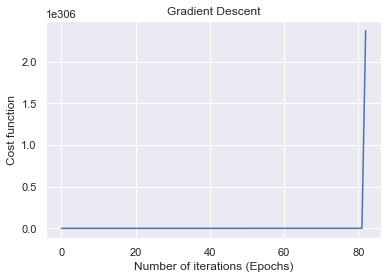

In [21]:
plt.plot(np.arange(len(ch)), ch)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Cost function")
plt.title("Gradient Descent")
plt.show()

In [22]:
# standardization
X1 = custard["Temperature"]
m_X = X1.mean()
sd_X = X1.std()
X1 = [(x-m_X)/sd_X for x in X1]

X = np.c_[np.ones((len(X),1)), X1]
Y = custard["Sales"]
m_Y = Y.mean()
sd_Y = Y.std()
Y = [(y-m_Y)/sd_Y for y in Y]

In [23]:
be2, ch2= gd(X, np.array(Y).reshape(-1,1), theta, 0.01, 1000)
be2

array([[5.38920558e-05],
       [8.23023389e-01]])

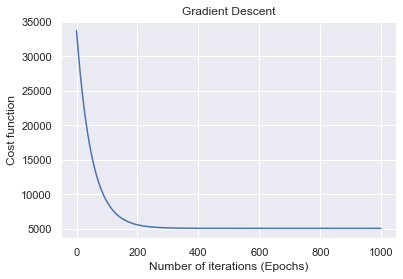

In [24]:
plt.plot(np.arange(len(ch2)), ch2)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Cost function")
plt.title("Gradient Descent")
plt.show()

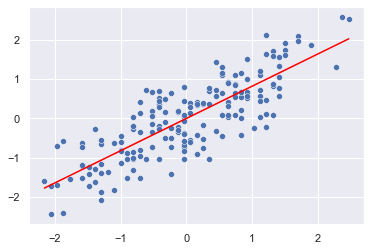

In [25]:
pr = be2[1]*X1 + be2[0]
sns.scatterplot(x = X1, y =  Y)
sns.lineplot(x=X1, y = pr, color='red')
plt.show()